**Домашнее задание к лекции «Корреляция и корреляционный анализ»**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

**Задание 1**.

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?


In [ ]:
df = pd.read_csv('/content/water.csv', sep = ',', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


In [ ]:
df.head(5)

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


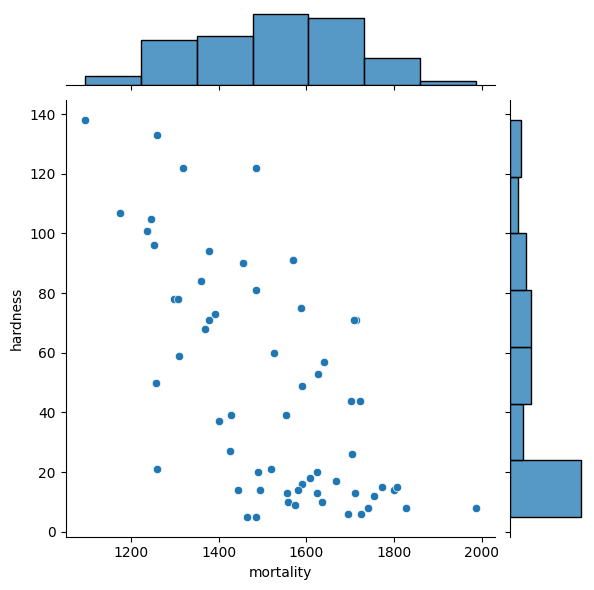

In [ ]:
# a. Построить точечный график
sns.jointplot(x='mortality', y ='hardness', data=df)

In [ ]:
# b. Рассчитать коэффициент корреляции Пирсона
pir = df[['mortality', 'hardness']].corr()


In [ ]:
# b. Рассчитать коэффициент корреляции Спирмена
spi = df[['mortality', 'hardness']].corr(method='spearman')

In [ ]:
# c. Построить модель линейной регрессии
X = df[['mortality']]
y = df['hardness']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([-0.13055019])

In [ ]:
lm.intercept_

245.26119532596624

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([82.46510589, 41.86399617, 50.08865827, 23.06476852, 74.63209437,
       33.11713331, 80.89850358, 38.0780406 , 46.95545366, 23.84806967,
       74.37099398, 51.39416019, 42.25564675, 10.2708497 , 22.15091718,
       58.83552113])

In [ ]:
y_test

1     105
6      10
47     14
32     44
14     78
56     20
35    133
50     75
13     21
41      6
34     59
60     81
17     39
4      14
54     71
18     39
Name: hardness, dtype: int64

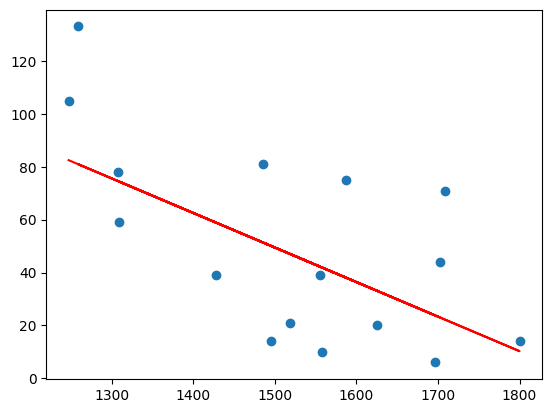

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
# d. Рассчитать коэффициент детерминации

R2 = metrics.r2_score(y_test, y_pred)


<Axes: xlabel='hardness', ylabel='Count'>

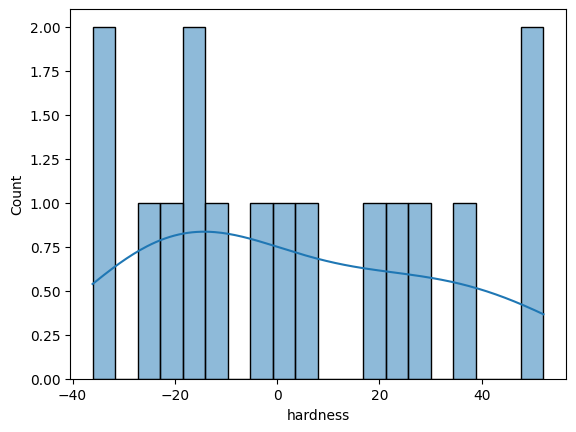

In [ ]:
# e. Вывести график остатков
sns.histplot((y_test-y_pred), kde=True, bins=20)



---



In [ ]:
tmp = [{'Location': 'all', 'Pirsen': pir['mortality']['hardness'], 'Spearman': spi['mortality']['hardness'], 'R2': R2}]
rez = pd.DataFrame(tmp)
rez

,Location,Pirsen,Spearman,R2
0,all,-0.654849,-0.631665,0.406423


Коэффициент детерминации 0,40 означает, что данных мало.

Коэффициеты корреляции -0,65 (Пирсен) или -0,63 (Спирмен) имеют отрицательный знак, значит зависимость обратная. Т.к. значения более  -0,8, то они не являются значимыми, а это значит зависимость слабая или отсутствует.



---



**Задание 2**.

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?


In [ ]:
df_s = df[df['location'] == 'South']
df_n = df[df['location'] == 'North']
df_n.head(5)

,location,town,mortality,hardness
2,North,Birkenhead,1668,17
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
6,North,Bolton,1558,10
7,North,Bootle,1807,15


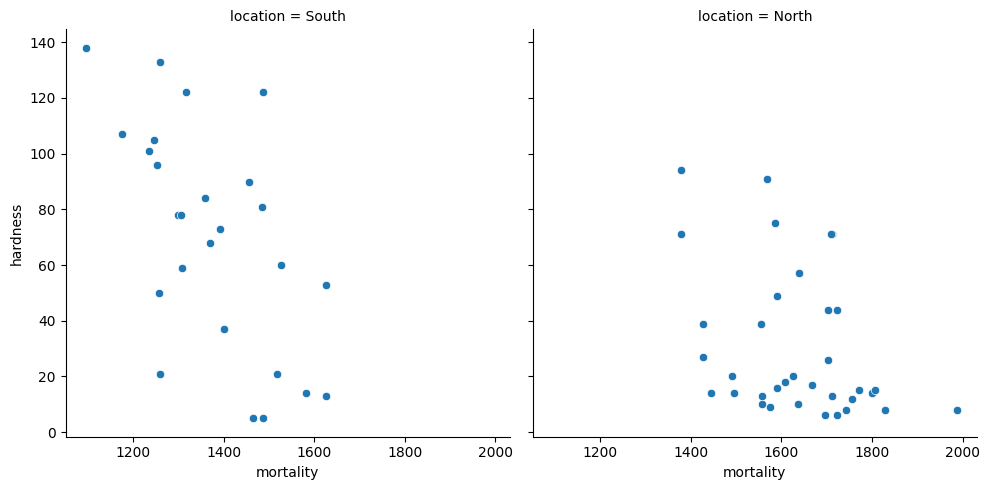

In [ ]:
# a. Построить точечный график
sns.relplot(
    x='mortality',
    y='hardness',
    data=df,
    kind='scatter',
    col='location')

In [ ]:
# b. Рассчитать коэффициент корреляции Пирсона
pir_s = df_s[['mortality', 'hardness']].corr()
pir_s

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
pir_n = df_n[['mortality', 'hardness']].corr()
pir_n

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
# Рассчитать коэффициент корреляции Спирмена
spi_s = df_s[['mortality', 'hardness']].corr(method='spearman')
spi_s

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [ ]:
spi_n = df_n[['mortality', 'hardness']].corr(method='spearman')
spi_n

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [ ]:
# c. Построить модель линейной регрессии
X_s = df_s[['mortality']]
y_s = df_s['hardness']
X_n = df_n[['mortality']]
y_n = df_n['hardness']

In [ ]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, random_state=42)
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, random_state=42)
lm_s = LinearRegression()
lm_n = LinearRegression()
lm_s.fit(X_s_train, y_s_train)
lm_n.fit(X_n_train, y_n_train)

LinearRegression()

In [ ]:
lm_s.coef_

array([-0.19144129])

In [ ]:
lm_n.coef_

array([-0.09308216])

In [ ]:
lm_s.intercept_

335.5684282411058

In [ ]:
lm_n.intercept_

183.5328689819372

In [ ]:
y_s_pred = lm_s.predict(X_s_test)
y_n_pred = lm_n.predict(X_n_test)
y_n_pred

array([-1.42138494, 37.02154756, 49.12222849, 23.0592234 , 35.43915082,
       24.08312717, 25.10703095, 21.38374451, 38.79010861])

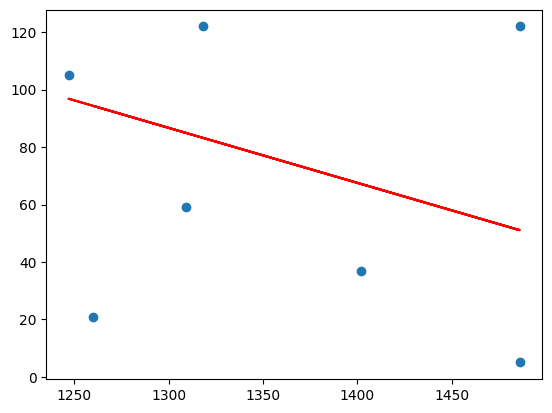

In [ ]:
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')

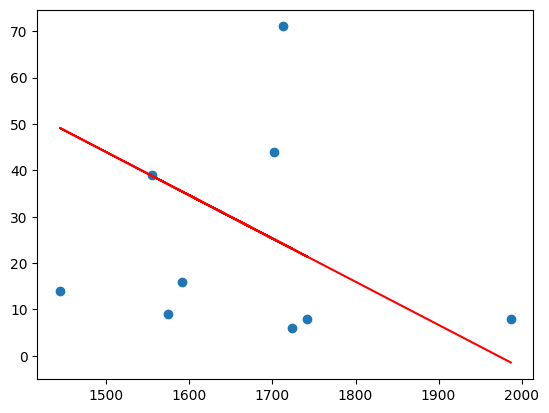

In [ ]:
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')

In [ ]:
# d. Рассчитать коэффициент детерминации

R2_s = metrics.r2_score(y_s_test, y_s_pred)
R2_n = metrics.r2_score(y_n_test, y_n_pred)

<Axes: xlabel='hardness', ylabel='Count'>

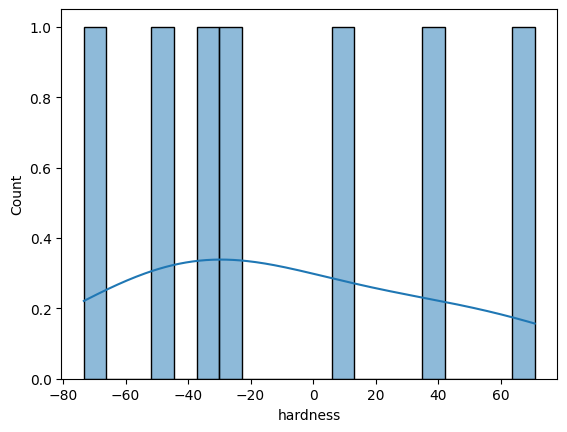

In [ ]:
# e. Вывести график остатков
sns.histplot((y_s_test-y_s_pred), kde=True, bins=20)

<Axes: xlabel='hardness', ylabel='Count'>

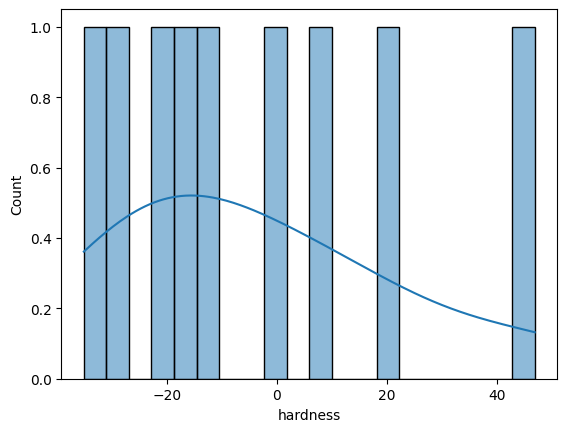

In [ ]:
sns.histplot((y_n_test-y_n_pred), kde=True, bins=20)



---



In [ ]:
tmp = [{'Location': 'South', 'Pirsen': pir_s['mortality']['hardness'], 'Spearman': spi_s['mortality']['hardness'], 'R2': R2_s},
       {'Location': 'North', 'Pirsen': pir_n['mortality']['hardness'], 'Spearman': spi_n['mortality']['hardness'], 'R2': R2_n}]
rez = pd.DataFrame(tmp)
rez

,Location,Pirsen,Spearman,R2
0,South,-0.602153,-0.595723,-0.087996
1,North,-0.368598,-0.404208,-0.358437


После разделения на две части данных, соответственно, стало меньше, поэтому коэффициент детерминации стал ещё ниже (-0,08 и -0,35)

Для северного региона коэффициенты Пирсена и Спирмена стали (-0,36 и -0,40, соответственно), что показывает факт того, что связь между жесткостью воды и смертностью в северных регионах практически отсутствует.

Для южных регионов связь между сметрностью и жесткостью воды практичски сохраняется в сравнении с общими показателями (-0,60 и -0,59)